## 第4章 Matplotlibでグラフを 描画しよう

### 4-4: 散布図

In [1]:
import matplotlib.pyplot as plt
import numpy as np

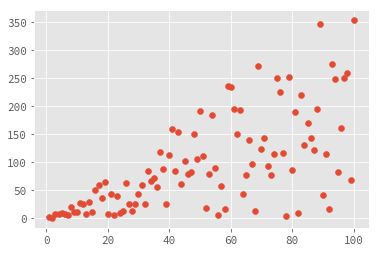

In [2]:
# リスト4.4.1：散布図の描画
plt.style.use("ggplot")
# 入力値の生成
np.random.seed(2)
x = np.arange(1, 101)
y = 4 * x * np.random.rand(100)
# 散布図の描画
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)
plt.show()

In [3]:
# リスト4.4.2：anime_master_csvデータの読み込み
import os
import pandas as pd

base_url = "https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/"
anime_master_csv = os.path.join(base_url, "anime_master.csv")
df = pd.read_csv(anime_master_csv)
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
# リスト4.4.3：anime_master_csvデータの再読み込み
df = pd.read_csv(anime_master_csv, index_col="anime_id")
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


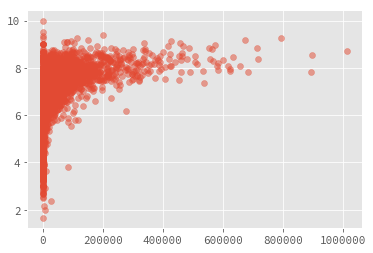

In [5]:
# リスト4.4.4：membersとratingの値で散布図を作成
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df["members"], df["rating"], alpha=0.5)
plt.show()

In [6]:
# リスト4.4.5：メンバ数80万人以上の作品
# membersの値でデータを絞り込み
df.loc[df["members"] >= 800000, ["name", "members"]]

,name,members
anime_id,,
1535,Death Note,1013917
16498,Shingeki no Kyojin,896229
11757,Sword Art Online,893100


In [7]:
# リスト4.4.6：メンバ数60万人以上かつレーティング8.5以上のデータ
# membersとratingの値でデータを絞り込み
df.loc[(df["members"] >= 600000) & (df["rating"] >= 8.5), ["name", "rating"]]

,name,rating
anime_id,,
5114,Fullmetal Alchemist: Brotherhood,9.26
9253,Steins;Gate,9.17
1575,Code Geass: Hangyaku no Lelouch,8.83
1535,Death Note,8.71
16498,Shingeki no Kyojin,8.54


In [8]:
# リスト4.4.7：typeの重複のないリスト
types = df["type"].unique()
types

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

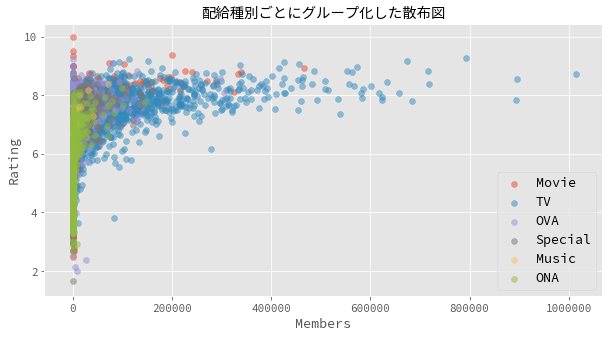

In [9]:
# リスト4.4.9：配給種別ごとにグループ化されたデータの散布図の作成
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
for t in types:
    x = df.loc[df["type"] == t, "members"]
    y = df.loc[df["type"] == t, "rating"]
    ax.scatter(x, y, alpha=0.5, label=t)
ax.set_title("配給種別ごとにグループ化した散布図")
ax.set_xlabel("Members")
ax.set_ylabel("Rating")
ax.legend(loc="lower right", fontsize=12)
plt.show()